In [1]:
from pathlib import Path
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# 查看task3原始数据和标签的元信息
def metadata(rawdatapathlist):

    image_shape_dict = {}   #{"shape tuple":[filepath]}
    image_origin_dict = {}  # {"origin tuple":[filepath]}
    image_spacing_dict = {}  # {"spacing tuple":[filepath]}
    slope_inter_dict = {}   #{"slope_inter tuple":[filepath]}
    
    # 循环读入每一个文件
    for rawdatapath in rawdatapathlist:
        # 读入单个文件
        img_file = nib.load(rawdatapath)
        # 读取头部信息
        img_header = img_file.header
        
        # 获取形状
        img_shape = img_header.get_data_shape()
        # 获取方向
        img_origin = nib.aff2axcodes(img_file.affine)
        # 获取像素间距
        img_spacing = img_header.get_zooms()
        # 获取斜率和截距
        slope_inter = (img_file.dataobj.slope, img_file.dataobj.inter)
        
        # 构建形状字典
        if img_shape in image_shape_dict:
            image_shape_dict[img_shape].append(rawdatapath)
        else:
            image_shape_dict[img_shape] = [rawdatapath]
            
        # 构建方向字典
        if img_origin in image_origin_dict:
            image_origin_dict[img_origin].append(rawdatapath)
        else:
            image_origin_dict[img_origin] = [rawdatapath]
        
        # 构建像素间距字典
        if img_spacing in image_spacing_dict:
            image_spacing_dict[img_spacing].append(rawdatapath)
        else:
            image_spacing_dict[img_spacing] = [rawdatapath]
            
        # 构建斜率和截距字典
        if slope_inter in slope_inter_dict:
            slope_inter_dict[slope_inter].append(rawdatapath)
        else:
            slope_inter_dict[slope_inter] = [rawdatapath]
        
    return image_shape_dict, image_origin_dict, image_spacing_dict, slope_inter_dict

In [2]:
# OAR数据集地址
oar_path = Path("F:/structSeg2019/Thoracic_OAR")
oar_data_path = [ str(p / "data.nii.gz") for p in list(oar_path.glob("*"))]
oar_label_path = [ str(p / "label.nii.gz") for p in list(oar_path.glob("*"))]

# GTV数据集地址
gtv_path = Path("F:/structSeg2019/Lung_GTV")
gtv_data_path = [ str(p / "data.nii.gz") for p in list(gtv_path.glob("*"))]
gtv_label_path = [ str(p / "label.nii.gz") for p in list(gtv_path.glob("*"))]

In [55]:
# 获取OAR数据集metadata信息
oar_data_shape, oar_data_origin, oar_data_spacing, oar_data_slope_inter = metadata(oar_data_path)
oar_label_shape, oar_label_origin, oar_label_spacing, oar_label_slope_inter = metadata(oar_label_path)


print("形状：",list(oar_data_shape.keys()), "\t", "形状数目", len(list(oar_data_shape.keys())))
print("方向：",list(oar_data_origin.keys()), "\t", "方向数目", len(list(oar_data_origin.keys())))
print("间距：",list(oar_data_spacing.keys()), "\t", "间距数目", len(list(oar_data_spacing.keys())))
print("斜率和截距：",list(oar_data_slope_inter.keys()), "\t", "斜率和截距数目", len(list(oar_data_slope_inter.keys())))

print("\n")

print("形状：",list(oar_label_shape.keys()), "\t", "形状数目", len(list(oar_label_shape.keys())))
print("方向：",list(oar_label_origin.keys()), "\t", "方向数目", len(list(oar_label_origin.keys())))
print("间距：",list(oar_label_spacing.keys()), "\t", "间距数目", len(list(oar_label_spacing.keys())))
print("斜率和截距：",list(oar_label_slope_inter.keys()), "\t", "斜率和截距数目", len(list(oar_label_slope_inter.keys())))

形状： [(512, 512, 96), (512, 512, 86), (512, 512, 105), (512, 512, 103), (512, 512, 82), (512, 512, 90), (512, 512, 88), (512, 512, 93), (512, 512, 101), (512, 512, 80), (512, 512, 95), (512, 512, 97), (512, 512, 108), (512, 512, 110), (512, 512, 99), (512, 512, 109), (512, 512, 107), (512, 512, 94), (512, 512, 87), (512, 512, 127), (512, 512, 102), (512, 512, 104), (512, 512, 91), (512, 512, 98), (512, 512, 81)] 	 形状数目 25
方向： [('L', 'P', 'S')] 	 方向数目 1
间距： [(0.9765625, 0.9765625, 5.0), (1.2246094, 1.2246094, 5.0), (1.171875, 1.171875, 5.0), (1.1875, 1.1875, 5.0), (1.1640625, 1.1640625, 5.0), (1.0898438, 1.0898438, 5.0), (1.1367188, 1.1367188, 5.0), (1.2871094, 1.2871094, 5.0), (1.1699219, 1.1699219, 5.0), (1.0878906, 1.0878906, 5.0), (1.2695312, 1.2695312, 5.0), (1.3671875, 1.3671875, 5.0), (1.1308594, 1.1308594, 5.0), (1.234375, 1.234375, 5.0), (1.171875, 1.171875, 3.0), (1.0742188, 1.0742188, 5.0), (1.3632812, 1.3632812, 5.0), (1.078125, 1.078125, 5.0), (1.1035156, 1.1035156, 5.0), (1

In [59]:
# 输出形状及其数量
for k,v in oar_data_shape.items():
    print(k,len(v))

(512, 512, 96) 2
(512, 512, 86) 2
(512, 512, 105) 1
(512, 512, 103) 3
(512, 512, 82) 5
(512, 512, 90) 4
(512, 512, 88) 2
(512, 512, 93) 3
(512, 512, 101) 1
(512, 512, 80) 1
(512, 512, 95) 2
(512, 512, 97) 4
(512, 512, 108) 2
(512, 512, 110) 1
(512, 512, 99) 1
(512, 512, 109) 1
(512, 512, 107) 2
(512, 512, 94) 3
(512, 512, 87) 2
(512, 512, 127) 1
(512, 512, 102) 2
(512, 512, 104) 2
(512, 512, 91) 1
(512, 512, 98) 1
(512, 512, 81) 1


In [61]:
# 输出间距及其数量
for k,v in oar_data_spacing.items():
    print(k,len(v))

(0.9765625, 0.9765625, 5.0) 5
(1.2246094, 1.2246094, 5.0) 1
(1.171875, 1.171875, 5.0) 14
(1.1875, 1.1875, 5.0) 3
(1.1640625, 1.1640625, 5.0) 1
(1.0898438, 1.0898438, 5.0) 1
(1.1367188, 1.1367188, 5.0) 1
(1.2871094, 1.2871094, 5.0) 2
(1.1699219, 1.1699219, 5.0) 2
(1.0878906, 1.0878906, 5.0) 1
(1.2695312, 1.2695312, 5.0) 2
(1.3671875, 1.3671875, 5.0) 6
(1.1308594, 1.1308594, 5.0) 1
(1.234375, 1.234375, 5.0) 1
(1.171875, 1.171875, 3.0) 1
(1.0742188, 1.0742188, 5.0) 1
(1.3632812, 1.3632812, 5.0) 1
(1.078125, 1.078125, 5.0) 1
(1.1035156, 1.1035156, 5.0) 1
(1.1054688, 1.1054688, 5.0) 1
(1.2324219, 1.2324219, 5.0) 1
(1.2226562, 1.2226562, 5.0) 1
(1.1757812, 1.1757812, 5.0) 1


In [56]:
# 获取GTV数据集metadata信息

gtv_data_shape, gtv_data_origin, gtv_data_spacing, gtv_data_slope_inter = metadata(gtv_data_path)
gtv_label_shape, gtv_label_origin, gtv_label_spacing, gtv_label_slope_inter = metadata(gtv_label_path)


print("形状：",list(gtv_data_shape.keys()), "\t", "形状数目", len(list(gtv_data_shape.keys())))
print("方向：",list(gtv_data_origin.keys()), "\t", "方向数目", len(list(gtv_data_origin.keys())))
print("间距：",list(gtv_data_spacing.keys()), "\t", "间距数目", len(list(gtv_data_spacing.keys())))
print("斜率和截距：",list(gtv_data_slope_inter.keys()), "\t", "斜率和截距数目", len(list(gtv_data_slope_inter.keys())))

print("\n")

print("形状：",list(gtv_label_shape.keys()), "\t", "形状数目", len(list(gtv_label_shape.keys())))
print("方向：",list(gtv_label_origin.keys()), "\t", "方向数目", len(list(gtv_label_origin.keys())))
print("间距：",list(gtv_label_spacing.keys()), "\t", "间距数目", len(list(gtv_label_spacing.keys())))
print("斜率和截距：",list(gtv_label_slope_inter.keys()), "\t", "斜率和截距数目", len(list(gtv_label_slope_inter.keys())))

形状： [(512, 512, 96), (512, 512, 86), (512, 512, 105), (512, 512, 103), (512, 512, 82), (512, 512, 90), (512, 512, 88), (512, 512, 93), (512, 512, 101), (512, 512, 80), (512, 512, 95), (512, 512, 97), (512, 512, 108), (512, 512, 110), (512, 512, 99), (512, 512, 109), (512, 512, 107), (512, 512, 94), (512, 512, 87), (512, 512, 127), (512, 512, 102), (512, 512, 104), (512, 512, 91), (512, 512, 98), (512, 512, 81)] 	 形状数目 25
方向： [('L', 'P', 'S')] 	 方向数目 1
间距： [(0.9765625, 0.9765625, 5.0), (1.2246094, 1.2246094, 5.0), (1.171875, 1.171875, 5.0), (1.1875, 1.1875, 5.0), (1.1640625, 1.1640625, 5.0), (1.0898438, 1.0898438, 5.0), (1.1367188, 1.1367188, 5.0), (1.2871094, 1.2871094, 5.0), (1.1699219, 1.1699219, 5.0), (1.0878906, 1.0878906, 5.0), (1.2695312, 1.2695312, 5.0), (1.3671875, 1.3671875, 5.0), (1.1308594, 1.1308594, 5.0), (1.234375, 1.234375, 5.0), (1.171875, 1.171875, 3.0), (1.0742188, 1.0742188, 5.0), (1.3632812, 1.3632812, 5.0), (1.078125, 1.078125, 5.0), (1.1035156, 1.1035156, 5.0), (1

In [62]:
def maxminvalue(rawdatapathlist):
    min_v = 0
    max_v = 0
    
    for rawdatapath in rawdatapathlist:
        
        # 读入图像文件
        img_file = nib.load(rawdatapath)
        # 获得图像数据数组
        img_data = img_file.get_fdata()
        
        img_minv = np.min(img_data)
        img_maxv = np.max(img_data)
        
        if img_minv<min_v:
            min_v = img_minv
        if img_maxv>max_v:
            max_v = img_maxv
        
    return min_v,max_v
        

In [63]:
mi, ma = maxminvalue(gtv_data_path)
print(mi,ma)

-1024.0 3071.0


### 肿瘤标记数量

In [16]:
# 判断nii文件中有标签的切片序号
# 返回值：有标签的切片序号列表。
def nii_number(nii_file):
    
    label_file = nib.load(nii_file)
    label_data = label_file.get_fdata()
    
    number_of_slice = label_data.shape[2]
    
    num_list = []
    
    for i in range(number_of_slice):
        data_i = label_data[:,:,i]
        
        # 利用均值不为0找出有标签的值
        if(data_i.mean()!=0):
            num_list.append(i)
            
    return num_list

In [67]:
a = 0
for path in gtv_label_path:
    num_list = nii_number(path)
    num = len(num_list)
    a = a+num
    print(path,num,"\t",num_list)
    print(a)

F:\structSeg2019\Lung_GTV\1\label.nii.gz 4 	 [47, 48, 49, 50]
4
F:\structSeg2019\Lung_GTV\10\label.nii.gz 19 	 [37, 38, 39, 40, 41, 46, 47, 48, 49, 50, 51, 52, 56, 57, 58, 59, 60, 66, 67]
23
F:\structSeg2019\Lung_GTV\11\label.nii.gz 25 	 [47, 48, 49, 50, 51, 52, 53, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 76, 78, 79, 80, 81]
48
F:\structSeg2019\Lung_GTV\12\label.nii.gz 39 	 [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
87
F:\structSeg2019\Lung_GTV\13\label.nii.gz 6 	 [37, 38, 39, 40, 41, 42]
93
F:\structSeg2019\Lung_GTV\14\label.nii.gz 16 	 [41, 42, 43, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60]
109
F:\structSeg2019\Lung_GTV\15\label.nii.gz 12 	 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
121
F:\structSeg2019\Lung_GTV\16\label.nii.gz 22 	 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 57, 58, 59, 60, 61, 62, 63, 64, 65]
143
F:\structSeg2019\Lung

### 肿瘤面积

In [18]:
import cv2

def area_count_2(nii_file):
    count = []
    
    for file in nii_file:
        label_file = nib.load(file)
        label_data = label_file.get_fdata()
        
        number_of_slice = label_data.shape[2]
        
        for i in range(number_of_slice):
            data_i = label_data[:,:,i].astype(np.uint8)
            
            # 利用均值不为0找出有标签的值
            if(data_i.mean()!=0.0):
                temp_img = np.copy(data_i)
                contours, hierarchy = cv2.findContours(temp_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                c_max = sorted(contours, key=cv2.contourArea, reverse=True)[0]
                area = cv2.contourArea(c_max)
                count.append(area)
            
    return count

In [81]:
type(gtv_label_path)

list

In [91]:
count = area_count_2(gtv_label_path)
count

[103.0,
 196.5,
 163.0,
 62.0,
 43.5,
 196.0,
 128.5,
 48.5,
 31.5,
 42.5,
 66.0,
 83.5,
 67.5,
 70.5,
 76.0,
 30.0,
 81.0,
 38.5,
 21.5,
 70.5,
 18.0,
 55.0,
 26.0,
 351.5,
 414.5,
 557.0,
 601.5,
 589.5,
 491.5,
 375.5,
 182.5,
 200.5,
 555.0,
 85.0,
 50.5,
 90.5,
 88.5,
 56.5,
 81.0,
 82.0,
 71.0,
 48.5,
 35.0,
 27.0,
 47.5,
 58.5,
 39.0,
 32.0,
 207.0,
 208.0,
 246.5,
 340.5,
 455.5,
 522.5,
 388.0,
 574.5,
 344.5,
 145.5,
 68.0,
 54.0,
 51.0,
 55.0,
 69.5,
 61.0,
 61.5,
 41.0,
 42.5,
 38.0,
 28.5,
 6.5,
 32.0,
 37.5,
 67.0,
 34.5,
 28.5,
 547.0,
 910.5,
 843.0,
 858.0,
 684.5,
 85.0,
 49.5,
 54.5,
 101.5,
 118.5,
 116.5,
 44.0,
 96.0,
 136.5,
 111.5,
 113.0,
 91.5,
 101.5,
 54.5,
 101.5,
 210.5,
 87.0,
 129.5,
 164.5,
 361.5,
 384.0,
 40.5,
 79.5,
 52.5,
 69.5,
 64.5,
 57.0,
 55.5,
 70.5,
 394.0,
 535.5,
 599.5,
 523.0,
 531.5,
 649.0,
 1029.0,
 1260.0,
 973.0,
 1111.5,
 752.0,
 254.0,
 136.0,
 149.5,
 215.0,
 231.5,
 164.5,
 246.5,
 278.5,
 418.5,
 378.0,
 382.0,
 220.5,
 75.0,
 

In [93]:
print(np.min(count), np.max(count), np.mean(count), np.median(count), np.var(count), np.std(count))

6.5 3138.0 488.5721893491124 227.5 366523.60307272157 605.4119284195857


(array([478., 159.,  72.,  38.,  36.,  19.,  13.,  17.,  10.,   3.]),
 array([   6.5 ,  319.65,  632.8 ,  945.95, 1259.1 , 1572.25, 1885.4 ,
        2198.55, 2511.7 , 2824.85, 3138.  ]),
 <a list of 10 Patch objects>)

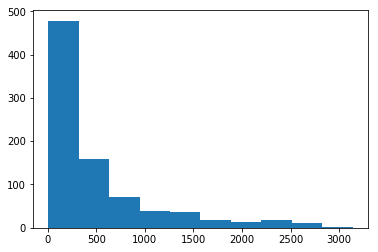

In [94]:
count= np.array(count)
plt.hist(count)

### 肺部癌变数

In [95]:
## task 3 massk为1，2， + task 4mask为1.来确认肺部的癌症切片数有多少


In [3]:
oar_label_path = [ str(p / "label.nii.gz") for p in list(oar_path.glob("*"))]
gtv_label_path = [ str(p / "label.nii.gz") for p in list(gtv_path.glob("*"))]



In [4]:
import os
os.path.dirname(gtv_label_path[0])

'F:\\structSeg2019\\Lung_GTV\\1'

In [ ]:
gtv_label_path[0].replace("label.nii.gz","lunglabel.nii.gz")

In [121]:
oar_label_path[0]

'F:\\structSeg2019\\Thoracic_OAR\\1\\label.nii.gz'

In [5]:
# 这个函数取原始肺部和腐蚀的肺部
from scipy.ndimage.morphology import binary_dilation,generate_binary_structure
from skimage.morphology import convex_hull_image

def process_mask(mask):
    """
    肺部Mask处理: 膨胀（此函数只能单边肺部调用）
    mask: 形状（x,y,z）
    """
    mask = mask.T # 从x，y，z变为 z,y,x
    convex_mask = np.copy(mask)
    for i_layer in range(convex_mask.shape[0]):
        # ascontiguousarray函数是将数组以连续数组的形式返回
        mask1  = np.ascontiguousarray(mask[i_layer])
        if np.sum(mask1)>0:
            # mask2是原mask的凸包mask
            mask2 = convex_hull_image(mask1)
            # 如果凸包mask比原mask大了5%，则用原mask继续计算
            if np.sum(mask2)>1.05*np.sum(mask1):
                mask2 = mask1
        else:
            mask2 = mask1
        convex_mask[i_layer] = mask2
    # 结构元素
    struct = generate_binary_structure(3,1)  
    # 用大小为struct来膨胀
    dilatedMask = binary_dilation(convex_mask,structure=struct,iterations=5) 
    
    # 再从z,y,x变为x,y,z
    dilatedMask = dilatedMask.T
    
    return dilatedMask

def extract_lung(oarlabelpathlist):

    for oarlabelpath in oarlabelpathlist:
        oar_file = nib.load(oarlabelpath)
        oar_data = oar_file.get_fdata()
        # 图像header
        header = oar_file.header.copy()
        
        m1 = oar_data == 1 # 肺1 # x,y,z
        m2 = oar_data == 2 # 肺2 # x,y,z
        
        # 肺部mask
        lungMask = m1 + m2 # bool类型
        lungMask_uint = lungMask.astype(np.uint8) # 转换为0-1,x,y,z
        # 根据原始标签得到的肺部mask
        raw_lung_img = nib.Nifti1Image(lungMask_uint, None, header=header) 
        
        # 左右肺部腐蚀
        dm1 = process_mask(m1)
        dm2 = process_mask(m2)
        # 腐蚀的肺部mask
        dilatedMask = dm1 + dm2 # bool类型
        dilatedMask_uint = dilatedMask.astype(np.uint8) # 转换为0-1，x,y,z
        # 腐蚀后得到的肺部mask
        dilated_lung_img = nib.Nifti1Image(dilatedMask_uint, None, header=header)
        
        # 保存
        nib.save(raw_lung_img, oarlabelpath.replace("Thoracic_OAR","Lung_GTV").replace("label.nii.gz","lunglabel.nii.gz"))
        nib.save(dilated_lung_img, oarlabelpath.replace("Thoracic_OAR","Lung_GTV").replace("label.nii.gz", "dilatedlunglabel.nii.gz"))

In [6]:
extract_lung(oar_label_path)

In [12]:
# 提取肺部肿瘤
def extract_lungtumour(lunglabelpathlist, dilatedlunglabelpathlist, gtvlabelpathlist):

    for lunglabelpath, dilatedlunglabelpath, gtvlabelpath in zip(lunglabelpathlist, dilatedlunglabelpathlist, gtvlabelpathlist):
        
        lung_file = nib.load(lunglabelpath)
        lung_data = lung_file.get_fdata().astype(np.uint8)  
        
        dilatedlung_file = nib.load(dilatedlunglabelpath)
        dilatedlung_data = dilatedlung_file.get_fdata().astype(np.uint8)  
        
        gtv_file = nib.load(gtvlabelpath)
        gtv_data = gtv_file.get_fdata().astype(np.uint8) 
        header = gtv_file.header.copy()
        
        lungtumourMask = lung_data & gtv_data
        dilated_lungtumourMask = dilatedlung_data & gtv_data

        lungtumour_img = nib.Nifti1Image(lungtumourMask, None, header=header)
        dilated_lungtumour_img = nib.Nifti1Image(dilated_lungtumourMask, None, header=header)

        nib.save(lungtumour_img, gtvlabelpath.replace("label.nii.gz","lungtumourlabel.nii.gz"))
        nib.save(dilated_lungtumour_img, gtvlabelpath.replace("label.nii.gz", "dilated_lungtumourlable.nii.gz"))

In [13]:
lung_label_path = [ str(p / "lunglabel.nii.gz") for p in list(gtv_path.glob("*"))]
dilated_lung_label_path = [ str(p / "dilatedlunglabel.nii.gz") for p in list(gtv_path.glob("*"))]
gtv_label_path = [ str(p / "label.nii.gz") for p in list(gtv_path.glob("*"))]

In [14]:
# 执行提取
extract_lungtumour(lung_label_path, dilated_lung_label_path, gtv_label_path)

# 删除上面的lunglabel.nii.gz和lungtumour.nii.gz
for gtv_label in gtv_label_path:
    lunglabelpath = gtv_label.replace("label.nii.gz","lunglabel.nii.gz")
    tumourlabelpath = gtv_label.replace("label.nii.gz", "lungtumour.nii.gz")
    
    if (os.path.exists(lunglabelpath)):
        os.remove(lunglabelpath)
    if (os.path.exists(tumourlabelpath)):
        os.remove(tumourlabelpath)

In [17]:
lungtumour_labelpath = [ str(p / "lungtumourlabel.nii.gz") for p in list(gtv_path.glob("*"))]
a = 0
for path in lungtumour_labelpath:
    num_list = nii_number(path)
    num = len(num_list)
    a = a+num
    print(path,"\t",num,"\t",num_list)
    print(a)

F:\structSeg2019\Lung_GTV\1\lungtumourlabel.nii.gz 	 4 	 [47, 48, 49, 50]
4
F:\structSeg2019\Lung_GTV\10\lungtumourlabel.nii.gz 	 7 	 [37, 38, 39, 40, 41, 56, 57]
11
F:\structSeg2019\Lung_GTV\11\lungtumourlabel.nii.gz 	 13 	 [47, 48, 49, 50, 51, 52, 53, 62, 63, 64, 65, 66, 71]
24
F:\structSeg2019\Lung_GTV\12\lungtumourlabel.nii.gz 	 12 	 [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
36
F:\structSeg2019\Lung_GTV\13\lungtumourlabel.nii.gz 	 6 	 [37, 38, 39, 40, 41, 42]
42
F:\structSeg2019\Lung_GTV\14\lungtumourlabel.nii.gz 	 5 	 [49, 50, 51, 53, 55]
47
F:\structSeg2019\Lung_GTV\15\lungtumourlabel.nii.gz 	 9 	 [38, 39, 40, 41, 43, 44, 45, 47, 48]
56
F:\structSeg2019\Lung_GTV\16\lungtumourlabel.nii.gz 	 5 	 [46, 47, 48, 49, 50]
61
F:\structSeg2019\Lung_GTV\17\lungtumourlabel.nii.gz 	 11 	 [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
72
F:\structSeg2019\Lung_GTV\18\lungtumourlabel.nii.gz 	 6 	 [42, 43, 44, 45, 46, 47]
78
F:\structSeg2019\Lung_GTV\19\lungtumourlabel.nii.gz 	 13 	 [28, 29,

0.0 2404.0 195.66315789473686 61.0 120319.26022160664 346.8706678599484


(array([364.,  59.,  18.,   9.,   7.,  10.,   3.,   1.,   2.,   2.]),
 array([   0. ,  240.4,  480.8,  721.2,  961.6, 1202. , 1442.4, 1682.8,
        1923.2, 2163.6, 2404. ]),
 <a list of 10 Patch objects>)

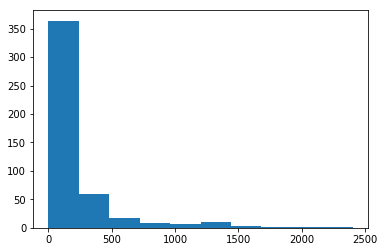

In [19]:
count = area_count_2(lungtumour_labelpath)
print(np.min(count), np.max(count), np.mean(count), np.median(count), np.var(count), np.std(count))
count= np.array(count)
plt.hist(count)

In [21]:
dilatedlungtumour_labelpath = [ str(p / "dilated_lungtumourlable.nii.gz") for p in list(gtv_path.glob("*"))]
a = 0
for path in dilatedlungtumour_labelpath:
    num_list = nii_number(path)
    num = len(num_list)
    a = a+num
    print(path,"\t",num,"\t",num_list)
    print(a)

F:\structSeg2019\Lung_GTV\1\dilated_lungtumourlable.nii.gz 	 4 	 [47, 48, 49, 50]
4
F:\structSeg2019\Lung_GTV\10\dilated_lungtumourlable.nii.gz 	 13 	 [37, 38, 39, 40, 41, 46, 47, 48, 49, 56, 57, 58, 59]
17
F:\structSeg2019\Lung_GTV\11\dilated_lungtumourlable.nii.gz 	 19 	 [47, 48, 49, 50, 51, 52, 53, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 78, 79]
36
F:\structSeg2019\Lung_GTV\12\dilated_lungtumourlable.nii.gz 	 32 	 [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 71, 72, 73, 74, 75]
68
F:\structSeg2019\Lung_GTV\13\dilated_lungtumourlable.nii.gz 	 6 	 [37, 38, 39, 40, 41, 42]
74
F:\structSeg2019\Lung_GTV\14\dilated_lungtumourlable.nii.gz 	 16 	 [41, 42, 43, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60]
90
F:\structSeg2019\Lung_GTV\15\dilated_lungtumourlable.nii.gz 	 12 	 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
102
F:\structSeg2019\Lung_GTV\16\dilated_lungtumourlable.nii.gz 	 19 	 [40, 41, 42, 43, 44, 45, 46, 47

0.0 2821.5 357.632333767927 163.0 253766.5284460529 503.7524475831883


(array([483., 140.,  53.,  24.,  25.,  15.,   5.,   8.,  11.,   3.]),
 array([   0.  ,  282.15,  564.3 ,  846.45, 1128.6 , 1410.75, 1692.9 ,
        1975.05, 2257.2 , 2539.35, 2821.5 ]),
 <a list of 10 Patch objects>)

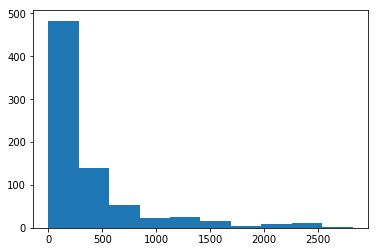

In [22]:
count = area_count_2(dilatedlungtumour_labelpath)
print(np.min(count), np.max(count), np.mean(count), np.median(count), np.var(count), np.std(count))
count= np.array(count)
plt.hist(count)